In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_RF_function_and_feature_ranking_TNGSIM as functions
import RF_target_predicting_and_learning_curves_functions_TNGSIM as tp_lc_functions

In [2]:
df_0D = pd.read_csv('TNG-SIM_images/v1_initial_analysis/v1_TNG-SIM_0D_Dataset.csv')
df_raw = pd.read_csv('TNG-SIM_images/v1_initial_analysis/v1_TNG-SIM_Raw_Dataset.csv')
print("df_0D.shape", df_0D.shape)
print("df_raw.shape", df_raw.shape)

df_0D.shape (12952, 15)
df_raw.shape (12952, 18)


### <font color='purple'> <a id =10> </a> <br> RF & Feature Ranking Complete 0D Dataset

In [3]:
df_0D.columns.to_list()

['SubhaloGasMetallicity',
 'SubhaloSFRinRad',
 'SubhaloStarMetallicity',
 'GroupNsubs',
 'GroupSpin_dmo',
 'SubhaloRstar_0D',
 'SubhaloRgas_0D',
 'SubhaloVmaxRad_0D',
 'SubhaloVmax_0D',
 'SubhaloVelDisp_0D',
 'SubhaloMgas_0D',
 'SubhaloMstar_0D',
 'SubhaloBHMass_0D',
 'GroupBHMass_0D',
 'SubhaloBHMdot_0D']

In [4]:
X_all = df_0D.drop(columns=['SubhaloRstar_0D'])
 

y_all = df_0D.loc[:,'SubhaloRstar_0D']

### The results below are the complete 0D dataset where VelDisp is also in 0D (VelDisp_0D). The R2 score is 0.78 now and VelDisp_0D does not contribute to prediction tremendously anymore.

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params, best score: 0.7813 {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 700}
RF Accuracy: 0.78 (+/- 0.01)


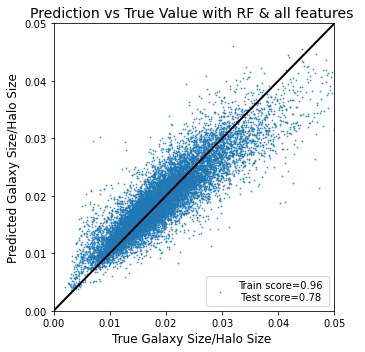

Elapsed time to compute the importances: 0.169 seconds
Elapsed time to compute the importances: 37.303 seconds


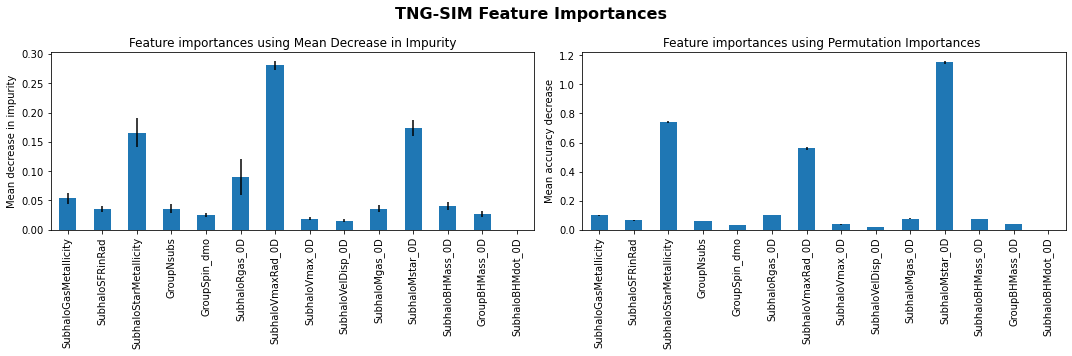

  0%|                                                    | 0/14 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  7%|███                                        | 1/14 [04:11<54:24, 251.11s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 14%|██████▏                                    | 2/14 [08:29<51:05, 255.46s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 21%|█████████▏                                 | 3/14 [12:36<46:07, 251.56s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 29%|████████████▎                              | 4/14 [14:33<33:06, 198.61s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 36%|███████████████▎                           | 5/14 [18:57<33:19, 222.16s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 43%|██████████████████▍                        | 6/14 [23:07<30:53, 231.64s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|█████████████████████▌                     | 7/14 [27:29<28:09, 241.38s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 57%|████████████████████████▌                  | 8/14 [32:16<25:35, 255.98s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 64%|███████████████████████████▋               | 9/14 [37:45<23:14, 278.90s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 71%|██████████████████████████████            | 10/14 [42:27<18:39, 279.88s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 79%|█████████████████████████████████         | 11/14 [48:28<15:14, 304.69s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 86%|████████████████████████████████████      | 12/14 [52:04<09:15, 277.70s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 93%|███████████████████████████████████████   | 13/14 [55:36<04:17, 257.52s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


100%|██████████████████████████████████████████| 14/14 [57:09<00:00, 244.97s/it]


1. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049


  0%|                                                    | 0/13 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  8%|███▏                                     | 1/13 [06:16<1:15:16, 376.42s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 15%|██████▎                                  | 2/13 [12:23<1:07:58, 370.77s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 23%|█████████▍                               | 3/13 [18:34<1:01:51, 371.11s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 31%|█████████████▏                             | 4/13 [23:45<52:05, 347.31s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 38%|████████████████▌                          | 5/13 [30:09<48:04, 360.51s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 46%|███████████████████▊                       | 6/13 [36:17<42:21, 363.02s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 54%|███████████████████████▏                   | 7/13 [42:05<35:48, 358.15s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 62%|██████████████████████████▍                | 8/13 [47:46<29:23, 352.73s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 69%|█████████████████████████████▊             | 9/13 [53:32<23:22, 350.66s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 77%|████████████████████████████████▎         | 10/13 [59:06<17:16, 345.54s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 85%|█████████████████████████████████▊      | 11/13 [1:04:31<11:18, 339.18s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 92%|████████████████████████████████████▉   | 12/13 [1:09:58<05:35, 335.55s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 13/13 [1:14:56<00:00, 345.86s/it]


2. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228


  0%|                                                    | 0/12 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  8%|███▍                                     | 1/12 [06:29<1:11:22, 389.28s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 17%|██████▊                                  | 2/12 [12:54<1:04:25, 386.60s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 25%|██████████▊                                | 3/12 [19:23<58:12, 388.09s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|██████████████▎                            | 4/12 [25:15<49:48, 373.62s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 42%|█████████████████▉                         | 5/12 [33:53<49:41, 425.91s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|█████████████████████▌                     | 6/12 [40:37<41:49, 418.17s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 58%|█████████████████████████                  | 7/12 [47:27<34:38, 415.62s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|████████████████████████████▋              | 8/12 [54:29<27:50, 417.59s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 75%|██████████████████████████████▊          | 9/12 [1:01:16<20:43, 414.45s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 83%|█████████████████████████████████▎      | 10/12 [1:08:11<13:49, 414.54s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 92%|████████████████████████████████████▋   | 11/12 [1:15:08<06:55, 415.14s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 12/12 [1:21:15<00:00, 406.31s/it]


3. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527


  0%|                                                    | 0/11 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  9%|███▋                                     | 1/11 [08:52<1:28:42, 532.22s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 18%|███████▍                                 | 2/11 [17:38<1:19:20, 528.91s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 27%|███████████▏                             | 3/11 [26:23<1:10:14, 526.82s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 36%|███████████████▋                           | 4/11 [34:31<59:41, 511.64s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 45%|███████████████████▌                       | 5/11 [43:27<52:01, 520.26s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 55%|███████████████████████▍                   | 6/11 [52:19<43:42, 524.50s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 64%|██████████████████████████               | 7/11 [1:01:17<35:15, 528.83s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 73%|█████████████████████████████▊           | 8/11 [1:10:16<26:36, 532.10s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 82%|█████████████████████████████████▌       | 9/11 [1:18:52<17:34, 527.00s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 91%|████████████████████████████████████▎   | 10/11 [1:27:32<08:44, 524.99s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 11/11 [1:35:10<00:00, 519.13s/it]


4. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 10%|████                                     | 1/10 [09:48<1:28:17, 588.61s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 20%|████████▏                                | 2/10 [19:47<1:19:18, 594.81s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 30%|████████████▎                            | 3/10 [29:03<1:07:18, 576.86s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 40%|█████████████████▏                         | 4/10 [39:06<58:42, 587.11s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|█████████████████████▌                     | 5/10 [49:01<49:09, 589.95s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 60%|█████████████████████████▊                 | 6/10 [59:01<39:33, 593.35s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 70%|████████████████████████████▋            | 7/10 [1:09:02<29:48, 596.03s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 80%|████████████████████████████████▊        | 8/10 [1:18:44<19:42, 591.45s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 90%|████████████████████████████████████▉    | 9/10 [1:28:26<09:48, 588.71s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 10/10 [1:37:04<00:00, 582.43s/it]


5. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827
	 5 GroupNsubs 0.7178061615159453


  0%|                                                     | 0/9 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 11%|████▋                                     | 1/9 [10:25<1:23:26, 625.82s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 22%|█████████▎                                | 2/9 [20:45<1:12:36, 622.30s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|██████████████                            | 3/9 [31:12<1:02:27, 624.50s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 44%|███████████████████▌                        | 4/9 [41:34<51:57, 623.42s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 56%|████████████████████████▍                   | 5/9 [51:53<41:27, 621.98s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|████████████████████████████              | 6/9 [1:02:25<31:16, 625.38s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 78%|████████████████████████████████▋         | 7/9 [1:12:54<20:52, 626.50s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 89%|█████████████████████████████████████▎    | 8/9 [1:23:27<10:28, 628.45s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 9/9 [1:32:55<00:00, 619.45s/it]


6. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827
	 5 GroupNsubs 0.7178061615159453
	 6 SubhaloSFRinRad 0.7427610972116562


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 12%|█████▎                                    | 1/8 [11:31<1:20:43, 691.87s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 25%|██████████▌                               | 2/8 [23:16<1:09:56, 699.46s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 38%|████████████████▌                           | 3/8 [35:01<58:29, 701.80s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|██████████████████████                      | 4/8 [46:43<46:48, 702.15s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 62%|███████████████████████████▌                | 5/8 [58:34<35:15, 705.01s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 75%|███████████████████████████████▌          | 6/8 [1:10:12<23:25, 702.72s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 88%|████████████████████████████████████▊     | 7/8 [1:21:49<11:41, 701.01s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 8/8 [1:32:17<00:00, 692.15s/it]


7. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827
	 5 GroupNsubs 0.7178061615159453
	 6 SubhaloSFRinRad 0.7427610972116562
	 7 SubhaloGasMetallicity 0.7585413846186603


  0%|                                                     | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 14%|██████                                    | 1/7 [12:47<1:16:43, 767.26s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 29%|████████████                              | 2/7 [25:29<1:03:40, 764.12s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 43%|██████████████████▊                         | 3/7 [38:13<50:57, 764.38s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 57%|█████████████████████████▏                  | 4/7 [51:03<38:19, 766.58s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 71%|██████████████████████████████            | 5/7 [1:03:45<25:29, 764.75s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 86%|████████████████████████████████████      | 6/7 [1:16:28<12:44, 764.17s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 7/7 [1:28:07<00:00, 755.32s/it]


8. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827
	 5 GroupNsubs 0.7178061615159453
	 6 SubhaloSFRinRad 0.7427610972116562
	 7 SubhaloGasMetallicity 0.7585413846186603
	 8 GroupBHMass_0D 0.7739562053535168


  0%|                                                     | 0/6 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 17%|███████                                   | 1/6 [14:46<1:13:51, 886.23s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|██████████████▋                             | 2/6 [29:34<59:09, 887.40s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|██████████████████████                      | 3/6 [44:25<44:27, 889.17s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|█████████████████████████████▎              | 4/6 [59:20<29:42, 891.42s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 83%|███████████████████████████████████       | 5/6 [1:14:02<14:47, 887.82s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 6/6 [1:27:38<00:00, 876.45s/it]


9. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827
	 5 GroupNsubs 0.7178061615159453
	 6 SubhaloSFRinRad 0.7427610972116562
	 7 SubhaloGasMetallicity 0.7585413846186603
	 8 GroupBHMass_0D 0.7739562053535168
	 9 GroupSpin_dmo 0.7781750258431946


  0%|                                                     | 0/5 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 20%|████████▍                                 | 1/5 [15:53<1:03:33, 953.45s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 40%|█████████████████▌                          | 2/5 [31:41<47:30, 950.06s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 60%|██████████████████████████▍                 | 3/5 [47:41<31:49, 954.66s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 80%|█████████████████████████████████▌        | 4/5 [1:03:26<15:51, 951.06s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 5/5 [1:18:02<00:00, 936.49s/it]


10. iteration: 
	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827
	 5 GroupNsubs 0.7178061615159453
	 6 SubhaloSFRinRad 0.7427610972116562
	 7 SubhaloGasMetallicity 0.7585413846186603
	 8 GroupBHMass_0D 0.7739562053535168
	 9 GroupSpin_dmo 0.7781750258431946
	 10 SubhaloVelDisp_0D 0.7775243037874601


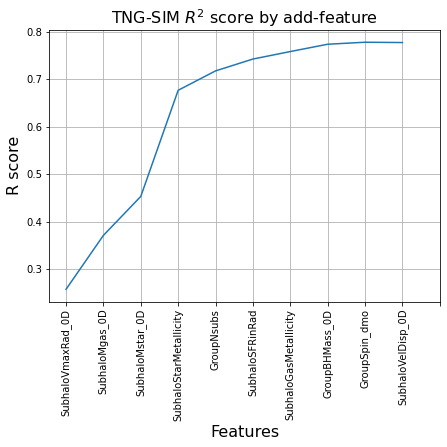

Elapsed time to run RF func on TNG-SIM: 54304.290 seconds


In [5]:
# this code takes 35,113 seconds ~ 10 hrs to run when the dataset is TNG-SIM galaxies with ~13,000 entries
# and 14 features (384 models for the RF; 288 models for each add-on feature ranking step, cv=3, so 864 fits )
start_time = time.time()

RF_results_all = functions.target_predicting_RF_function(X=X_all, y=y_all)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on TNG-SIM: {elapsed_time:.3f} seconds")

	 1 SubhaloVmaxRad_0D 0.2578843789754049
	 2 SubhaloMgas_0D 0.3714370006394228
	 3 SubhaloMstar_0D 0.4534827203702527
	 4 SubhaloStarMetallicity 0.6769791226558827
	 5 GroupNsubs 0.7178061615159453
	 6 SubhaloSFRinRad 0.7427610972116562
	 7 SubhaloGasMetallicity 0.7585413846186603
	 8 GroupBHMass_0D 0.7739562053535168
	 9 GroupSpin_dmo 0.7781750258431946
	 10 SubhaloVelDisp_0D 0.7775243037874601

### The results below are the complete 0D dataset where all the features are 0D but VelDisp. The R2 score is 0.81 and VelDisp contributes as an important feature, increasing the R2 score by 0.1.

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params, best score: 0.8081 {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
RF Accuracy: 0.81 (+/- 0.02)


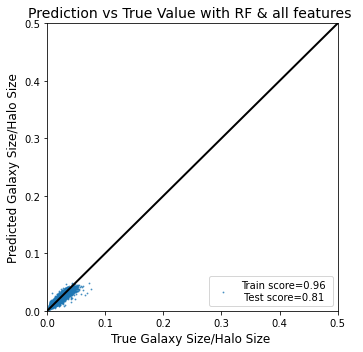

Elapsed time to compute the importances: 0.111 seconds
Elapsed time to compute the importances: 26.218 seconds


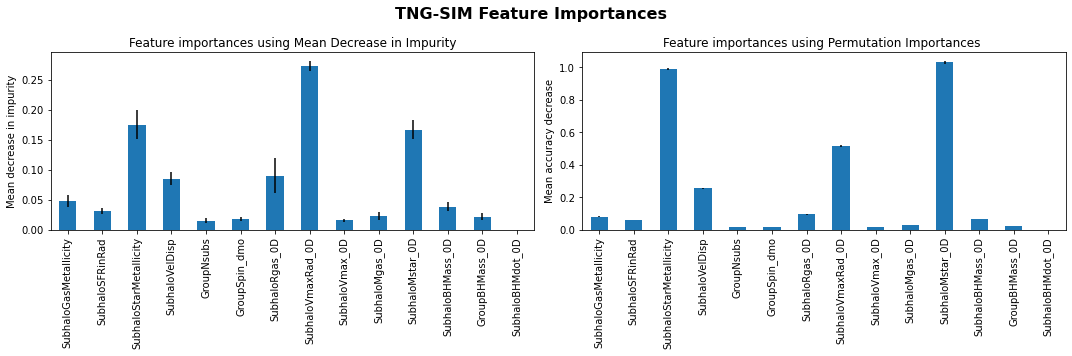

  0%|                                                    | 0/14 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  7%|███                                        | 1/14 [02:34<33:26, 154.34s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 14%|██████▏                                    | 2/14 [05:17<31:51, 159.28s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 21%|█████████▏                                 | 3/14 [07:56<29:14, 159.48s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 29%|████████████▎                              | 4/14 [10:54<27:44, 166.49s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 36%|███████████████▎                           | 5/14 [12:03<19:42, 131.41s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 43%|██████████████████▍                        | 6/14 [15:01<19:39, 147.46s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|█████████████████████▌                     | 7/14 [17:52<18:05, 155.10s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 57%|████████████████████████▌                  | 8/14 [20:50<16:14, 162.36s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 64%|███████████████████████████▋               | 9/14 [24:05<14:21, 172.38s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 71%|██████████████████████████████            | 10/14 [26:49<11:19, 169.96s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 79%|█████████████████████████████████         | 11/14 [30:17<09:04, 181.49s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 86%|████████████████████████████████████      | 12/14 [32:17<05:25, 162.96s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 93%|███████████████████████████████████████   | 13/14 [34:14<02:28, 148.89s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


100%|██████████████████████████████████████████| 14/14 [34:56<00:00, 149.78s/it]


1. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054


  0%|                                                    | 0/13 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  8%|███▎                                       | 1/13 [03:48<45:42, 228.52s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 15%|██████▌                                    | 2/13 [07:30<41:12, 224.77s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 23%|█████████▉                                 | 3/13 [11:15<37:30, 225.01s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 31%|█████████████▏                             | 4/13 [15:03<33:54, 226.09s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 38%|████████████████▌                          | 5/13 [18:05<28:01, 210.13s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 46%|███████████████████▊                       | 6/13 [21:58<25:24, 217.81s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 54%|███████████████████████▏                   | 7/13 [25:43<22:00, 220.11s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 62%|██████████████████████████▍                | 8/13 [29:21<18:18, 219.61s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 69%|█████████████████████████████▊             | 9/13 [33:05<14:43, 220.80s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 77%|████████████████████████████████▎         | 10/13 [36:49<11:05, 222.00s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 85%|███████████████████████████████████▌      | 11/13 [40:35<07:26, 223.01s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 92%|██████████████████████████████████████▊   | 12/13 [44:19<03:43, 223.38s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 13/13 [47:30<00:00, 219.24s/it]


2. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457


  0%|                                                    | 0/12 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  8%|███▌                                       | 1/12 [04:29<49:27, 269.81s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 17%|███████▏                                   | 2/12 [08:59<44:55, 269.59s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 25%|██████████▊                                | 3/12 [13:27<40:21, 269.02s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|██████████████▎                            | 4/12 [17:43<35:10, 263.80s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 42%|█████████████████▉                         | 5/12 [21:22<28:52, 247.54s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|█████████████████████▌                     | 6/12 [25:36<24:58, 249.73s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 58%|█████████████████████████                  | 7/12 [29:46<20:50, 250.02s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|████████████████████████████▋              | 8/12 [34:08<16:55, 253.87s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 75%|████████████████████████████████▎          | 9/12 [38:30<12:49, 256.43s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 83%|███████████████████████████████████       | 10/12 [43:00<08:41, 260.55s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 92%|██████████████████████████████████████▌   | 11/12 [47:26<04:22, 262.20s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 12/12 [51:15<00:00, 256.26s/it]


3. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407


  0%|                                                    | 0/11 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
  9%|███▉                                       | 1/11 [05:46<57:47, 346.78s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 18%|███████▊                                   | 2/11 [11:15<50:26, 336.27s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 27%|███████████▋                               | 3/11 [16:43<44:19, 332.39s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 36%|███████████████▋                           | 4/11 [22:13<38:41, 331.64s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 45%|███████████████████▌                       | 5/11 [27:39<32:55, 329.32s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 55%|███████████████████████▍                   | 6/11 [33:37<28:15, 339.18s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 64%|███████████████████████████▎               | 7/11 [39:38<23:04, 346.23s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 73%|███████████████████████████████▎           | 8/11 [45:41<17:34, 351.59s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 82%|███████████████████████████████████▏       | 9/11 [51:28<11:40, 350.17s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 91%|██████████████████████████████████████▏   | 10/11 [57:14<05:48, 348.97s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 11/11 [1:02:09<00:00, 339.06s/it]


4. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
	 4 SubhaloStarMetallicity 0.6740147572378318


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 10%|████▎                                      | 1/10 [06:33<59:05, 393.93s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 20%|████████▌                                  | 2/10 [13:12<52:51, 396.47s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 30%|████████████▉                              | 3/10 [19:54<46:32, 398.92s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 40%|█████████████████▏                         | 4/10 [26:27<39:41, 396.87s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|█████████████████████▌                     | 5/10 [33:09<33:12, 398.57s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 60%|█████████████████████████▊                 | 6/10 [39:46<26:31, 397.96s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 70%|██████████████████████████████             | 7/10 [46:21<19:51, 397.09s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 80%|██████████████████████████████████▍        | 8/10 [52:58<13:14, 397.07s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 90%|██████████████████████████████████████▋    | 9/10 [59:30<06:35, 395.56s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|████████████████████████████████████████| 10/10 [1:05:06<00:00, 390.65s/it]


5. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
	 4 SubhaloStarMetallicity 0.6740147572378318
	 5 SubhaloVelDisp 0.7722490745389369


  0%|                                                     | 0/9 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 11%|████▉                                       | 1/9 [07:21<58:48, 441.12s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 22%|█████████▊                                  | 2/9 [14:39<51:15, 439.37s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 33%|██████████████▋                             | 3/9 [21:33<42:47, 427.98s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 44%|███████████████████▌                        | 4/9 [28:57<36:10, 434.16s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 56%|████████████████████████▍                   | 5/9 [36:20<29:09, 437.46s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|█████████████████████████████▎              | 6/9 [43:44<21:58, 439.59s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 78%|██████████████████████████████████▏         | 7/9 [51:05<14:40, 440.19s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 89%|███████████████████████████████████████     | 8/9 [58:26<07:20, 440.29s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 9/9 [1:04:58<00:00, 433.16s/it]


6. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
	 4 SubhaloStarMetallicity 0.6740147572378318
	 5 SubhaloVelDisp 0.7722490745389369
	 6 SubhaloGasMetallicity 0.785621314542364


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 12%|█████▌                                      | 1/8 [08:05<56:38, 485.54s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 25%|███████████                                 | 2/8 [15:46<47:07, 471.24s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 38%|████████████████▌                           | 3/8 [23:54<39:53, 478.71s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|██████████████████████                      | 4/8 [31:57<32:02, 480.50s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 62%|███████████████████████████▌                | 5/8 [40:05<24:09, 483.19s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 75%|█████████████████████████████████           | 6/8 [48:08<16:06, 483.20s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 88%|██████████████████████████████████████▌     | 7/8 [56:17<08:04, 484.99s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████████████████████████████████████| 8/8 [1:03:36<00:00, 477.02s/it]


7. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
	 4 SubhaloStarMetallicity 0.6740147572378318
	 5 SubhaloVelDisp 0.7722490745389369
	 6 SubhaloGasMetallicity 0.785621314542364
	 7 SubhaloSFRinRad 0.7993461646962868


  0%|                                                     | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 14%|██████▎                                     | 1/7 [08:28<50:53, 508.95s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 29%|████████████▌                               | 2/7 [17:20<43:31, 522.26s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 43%|██████████████████▊                         | 3/7 [25:53<34:32, 518.04s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 57%|█████████████████████████▏                  | 4/7 [34:34<25:58, 519.34s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 71%|███████████████████████████████▍            | 5/7 [43:12<17:17, 518.89s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 86%|█████████████████████████████████████▋      | 6/7 [51:51<08:38, 518.66s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


100%|████████████████████████████████████████████| 7/7 [59:44<00:00, 512.06s/it]


8. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
	 4 SubhaloStarMetallicity 0.6740147572378318
	 5 SubhaloVelDisp 0.7722490745389369
	 6 SubhaloGasMetallicity 0.785621314542364
	 7 SubhaloSFRinRad 0.7993461646962868
	 8 SubhaloBHMass_0D 0.8061225147485155


  0%|                                                     | 0/6 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 17%|███████▎                                    | 1/6 [09:34<47:51, 574.23s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 33%|██████████████▋                             | 2/6 [19:37<39:25, 591.49s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 50%|██████████████████████                      | 3/6 [29:35<29:42, 594.23s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 67%|█████████████████████████████▎              | 4/6 [39:37<19:54, 597.27s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 83%|████████████████████████████████████▋       | 5/6 [49:31<09:56, 596.17s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


100%|████████████████████████████████████████████| 6/6 [58:40<00:00, 586.72s/it]


9. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
	 4 SubhaloStarMetallicity 0.6740147572378318
	 5 SubhaloVelDisp 0.7722490745389369
	 6 SubhaloGasMetallicity 0.785621314542364
	 7 SubhaloSFRinRad 0.7993461646962868
	 8 SubhaloBHMass_0D 0.8061225147485155
	 9 SubhaloBHMdot_0D 0.8080028219462899


  0%|                                                     | 0/5 [00:00<?, ?it/s]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 20%|████████▊                                   | 1/5 [09:30<38:02, 570.54s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 40%|█████████████████▌                          | 2/5 [19:27<29:18, 586.19s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 60%|██████████████████████████▍                 | 3/5 [29:21<19:39, 589.59s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


 80%|███████████████████████████████████▏        | 4/5 [39:16<09:51, 591.94s/it]

Fitting 3 folds for each of 288 candidates, totalling 864 fits


100%|████████████████████████████████████████████| 5/5 [49:06<00:00, 589.38s/it]


10. iteration: 
	 1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
	 4 SubhaloStarMetallicity 0.6740147572378318
	 5 SubhaloVelDisp 0.7722490745389369
	 6 SubhaloGasMetallicity 0.785621314542364
	 7 SubhaloSFRinRad 0.7993461646962868
	 8 SubhaloBHMass_0D 0.8061225147485155
	 9 SubhaloBHMdot_0D 0.8080028219462899
	 10 SubhaloVmax_0D 0.8075479424127586


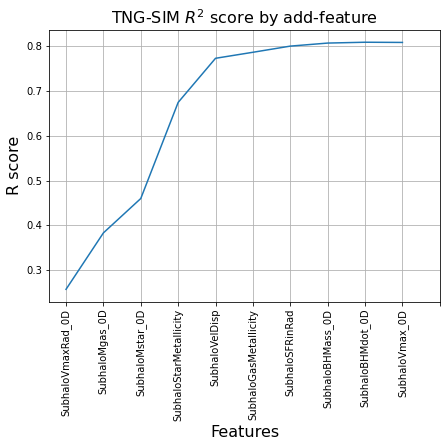

Elapsed time to run RF func on TNG-SIM: 35113.776 seconds


In [6]:
# 1st Run
# this code takes 35,113 seconds ~ 10 hrs to run when the dataset is TNG-SIM galaxies with ~13,000 entries
# and 14 features (288 models, cv=3 so 864 fits for each add-on feature ranking step)
start_time = time.time()

RF_results_all = functions.target_predicting_RF_function(X=X_all, y=y_all)

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func on TNG-SIM: {elapsed_time:.3f} seconds")

### 1st Run
Fitting 5 folds for each of 288 candidates, totalling 1440 fits:

    # number of trees in random forest
    n_estimators = [20,50,100, 500]
    # create random grid
    grid = {'bootstrap': [True],
                   'max_depth': [5, 10, None],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4, 8],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': n_estimators}
    # Grid search of parameters
    rfr_grid = GridSearchCV(estimator = regr_RF, param_grid = grid, cv = KFold(n_splits=5, shuffle=True),                          verbose = 1, n_jobs = -1, return_train_score=True)
    
  Best params, best score: 0.8081 {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}

RF Accuracy: 0.81 (+/- 0.02)  

#### The most important features (cv=3, 288 candidates, totalling 864 fits):

     1 SubhaloVmaxRad_0D 0.25781407905707054
	 2 SubhaloMgas_0D 0.38345790712386457
	 3 SubhaloMstar_0D 0.46001314065816407
     4 SubhaloStarMetallicity 0.6740147572378318
     5 SubhaloVelDisp 0.7722490745389369
	 6 SubhaloGasMetallicity 0.785621314542364
	 7 SubhaloSFRinRad 0.7993461646962868
	 8 SubhaloBHMass_0D 0.8061225147485155
	 9 SubhaloBHMdot_0D 0.8080028219462899
	 10 SubhaloVmax_0D 0.8075479424127586

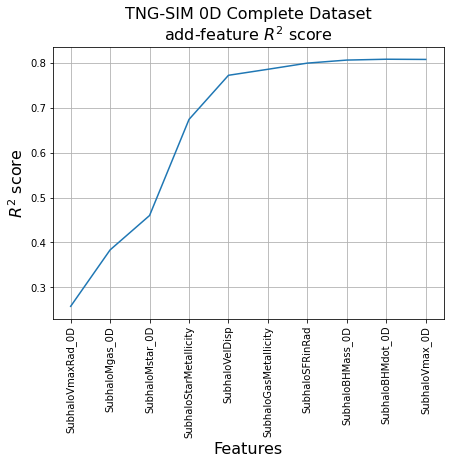

In [44]:
group2_fig_add_feature=RF_results_all[4].plot(x='features', y='r_sq_score', rot=90, figsize=(7,5), use_index=True,
                    legend=False, grid=True, 
                    xticks=range(0,10))
group2_fig_add_feature.set_title(label= r'TNG-SIM 0D Complete Dataset' + '\n' + r'add-feature $R^{2}$ score',fontsize=16)
group2_fig_add_feature.set_xlabel('Features',fontsize=16)
group2_fig_add_feature.set_ylabel(r'$R^{2}$ score',fontsize=16)

# group2_fig_add_feature.get_figure().savefig('TNG-SIM_images/v2_RF_FeatRank/v2_TNG-SIM_0D_AllDataset_R_score_by_add_feature_method.jpg', dpi=500)

plt.show()

In [11]:
# RF_results_all[4].to_csv('TNG-SIM_images/v2_RF_FeatRank/v2_TNG_0D_AllDataset_Max_r_scores_by_add_column_method.csv', index=False)

group2 = pd.read_csv('TNG-SIM_images/v2_RF_FeatRank/v2_TNG_0D_AllDataset_Max_r_scores_by_add_column_method.csv')

group2_fig = RF_results_all[1]
# group2_fig.savefig('TNG-SIM_images/v2_RF_FeatRank/v2_TNG_0D_AllDataset_RF_Prediction_vs_True.jpeg', dpi=500)
plt.show()

group2_fig_builtin_imp = RF_results_all[2]
# group2_fig_builtin_imp.savefig('TNG-SIM_images/v2_RF_FeatRank/v2_TNG_0D_AllDataset_Built_in_Feature_Ranking.jpeg', dpi=500)
plt.show()

In [13]:
y_pred_RF_df_all = RF_results_all[0]
# y_pred_RF_df_all = pd.DataFrame({'y_pred_RF SIM 0D': y_pred_RF_df_all})

# y_pred_RF_df_all.to_csv('TNG-SIM_images/v2_RF_FeatRank/v2_TNG-SIM_0D_AllDataset_y_pred_RF_predicted_sizes.csv', index=False)

y_pred_RF_all = pd.read_csv('TNG-SIM_images/v2_RF_FeatRank/v2_TNG-SIM_0D_AllDataset_y_pred_RF_predicted_sizes.csv')

In [14]:
group2

,feature_number,features,r_sq_score
0,1,SubhaloVmaxRad_0D,0.257814
1,2,SubhaloMgas_0D,0.383458
2,3,SubhaloMstar_0D,0.460013
3,4,SubhaloStarMetallicity,0.674015
4,5,SubhaloVelDisp,0.772249
5,6,SubhaloGasMetallicity,0.785621
6,7,SubhaloSFRinRad,0.799346
7,8,SubhaloBHMass_0D,0.806123
8,9,SubhaloBHMdot_0D,0.808003
9,10,SubhaloVmax_0D,0.807548


In [15]:
y_pred_RF_all

,y_pred_RF SIM 0D
0,0.028584
1,0.036262
2,0.029639
3,0.022373
4,0.035636
...,...
12947,0.043342
12948,0.035036
12949,0.043421
12950,0.042375


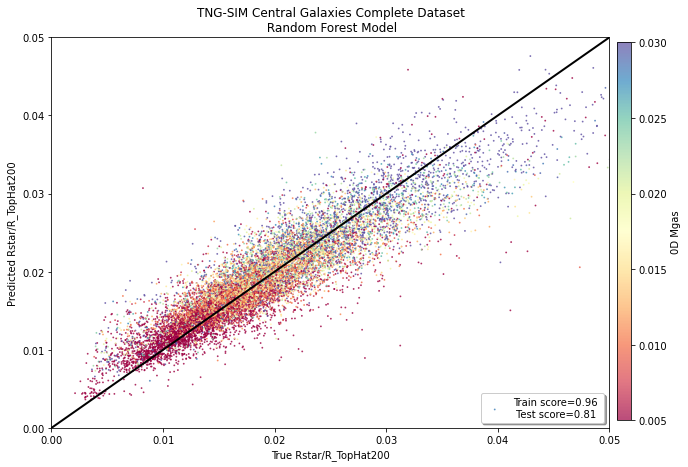

In [40]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))

label = ('Train score=0.96 \n Test score=0.81')
im5 = ax5.scatter(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all, s=3, marker='.', alpha=0.7, label=label,
                 c = df_0D.loc[:, 'SubhaloMgas_0D'],cmap='Spectral', vmin=0.005, vmax=0.03)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
ax5.axis([0.0,0.05, 0.0,0.05])
ax5.plot([0.0, 0.05], [0.0, 0.05], color = 'black', linewidth = 2)
ax5.set_title(r'TNG-SIM Central Galaxies Complete Dataset' + '\n Random Forest Model')
ax5.set_xlabel('True Rstar/R_TopHat200')
ax5.set_ylabel('Predicted Rstar/R_TopHat200')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'0D Mgas')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v2_RF_FeatRank/v2_TNG-SIM_0D_AllDataset_RF_size_prediction_colorMgas.jpeg", dpi=500)
plt.show()

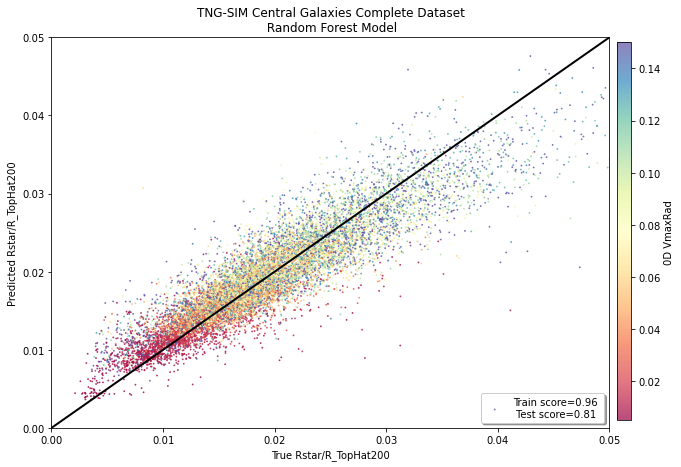

In [39]:
fig1, ax5 = plt.subplots(nrows=1,ncols=1, figsize=(10,7))

label = ('Train score=0.96 \n Test score=0.81')
im5 = ax5.scatter(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all, s=3, marker='.', alpha=0.7, label=label,
                 c = df_0D.loc[:, 'SubhaloVmaxRad_0D'],cmap='Spectral', vmin=0.005, vmax=0.15)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
ax5.axis([0.0,0.05, 0.0,0.05])
ax5.plot([0.0, 0.05], [0.0, 0.05], color = 'black', linewidth = 2)
ax5.set_title(r'TNG-SIM Central Galaxies Complete Dataset' + '\n Random Forest Model')
ax5.set_xlabel('True Rstar/R_TopHat200')
ax5.set_ylabel('Predicted Rstar/R_TopHat200')
ax5.legend(loc='lower right', shadow=True)

cbar_ax = fig1.add_axes([0.91, 0.14, 0.02, 0.75])
fig1.colorbar(im5, cax=cbar_ax, label=r'0D VmaxRad')

fig1.subplots_adjust(top=0.9, hspace=2.0, wspace=0.03)
# fig1.tight_layout()
# fig1.savefig("TNG-SIM_images/v2_RF_FeatRank/v2_TNG-SIM_0D_AllDataset_RF_size_prediction_colorVmaxRad.jpeg", dpi=500)
plt.show()

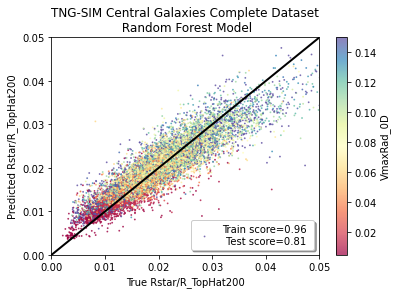

In [25]:
label = ('Train score=0.96 \n Test score=0.81')
plt.scatter(df_0D.loc[:, 'SubhaloRstar_0D'], y_pred_RF_all, s=3, marker='.', alpha=0.7, label=label,
                c = df_0D.loc[:, 'SubhaloVmaxRad_0D'],cmap='Spectral', vmin=0.005, vmax=0.15)
# ax5.set_xlim(auto=True)
# ax5.set_xticks([9.0, 9.5, 10.0, 10.5, 11.0])
# ax5.set_ylim(auto=True)
plt.axis([0.0,0.05, 0.0,0.05])
plt.plot([0.0, 0.05], [0.0, 0.05], color = 'black', linewidth = 2)
plt.title(r'TNG-SIM Central Galaxies Complete Dataset' + '\n Random Forest Model')
plt.xlabel('True Rstar/R_TopHat200')
plt.ylabel('Predicted Rstar/R_TopHat200')
plt.legend(loc='lower right', shadow=True)
plt.colorbar(label=r'VmaxRad_0D')

# plt.savefig("TNG-SIM_images/v2_RF_FeatRank/v2_TNG-SIM_0D_AllDataset_RF_size_prediction_colorVmaxRad.jpeg", dpi=500)
plt.show()